<a href="https://colab.research.google.com/github/Mr-nvk/MachineLearning/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!!pip install kaggle

['Requirement already satisfied: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.0)',
 'Requirement already satisfied: python-dateutil in /usr/local/lib/python3.6/dist-packages (from kaggle) (2.5.3)',
 'Requirement already satisfied: six>=1.10 in /usr/local/lib/python3.6/dist-packages (from kaggle) (1.11.0)',
 'Requirement already satisfied: urllib3<1.23.0,>=1.15 in /usr/local/lib/python3.6/dist-packages (from kaggle) (1.22)',
 'Requirement already satisfied: certifi in /usr/local/lib/python3.6/dist-packages (from kaggle) (2018.11.29)',
 'Requirement already satisfied: python-slugify in /usr/local/lib/python3.6/dist-packages (from kaggle) (1.2.6)',
 'Requirement already satisfied: tqdm in /usr/local/lib/python3.6/dist-packages (from kaggle) (4.28.1)',
 'Requirement already satisfied: requests in /usr/local/lib/python3.6/dist-packages (from kaggle) (2.18.4)',
 'Requirement already satisfied: Unidecode>=0.04.16 in /usr/local/lib/python3.6/dist-packages (from python-slugify->kaggle)

In [0]:
!ls -a

.  ..  .config	sample_data


In [0]:
!mkdir .kaggle

In [0]:
!ls -a 

.  ..  .config	.kaggle  sample_data


In [0]:
!cd ./kaggle

/bin/bash: line 0: cd: ./kaggle: No such file or directory


In [0]:
!cd .kaggle

In [0]:
!ls -a

.  ..  .config	.kaggle  sample_data


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"naveenkumawat","key":"b8b73f904fa8a096efb9a0464afb125e"}'}

In [0]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/kaggle.json

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c pubg-finish-placement-prediction

 53% 9.00M/16.9M [00:00<00:00, 52.1MB/s]
100% 16.9M/16.9M [00:00<00:00, 85.0MB/s]
 99% 97.0M/98.3M [00:00<00:00, 94.1MB/s]
100% 98.3M/98.3M [00:00<00:00, 177MB/s] 
 99% 237M/239M [00:02<00:00, 111MB/s]
100% 239M/239M [00:02<00:00, 117MB/s]


In [0]:
!unzip train_V2.csv.zip
!unzip test_V2.csv.zip

Archive:  train_V2.csv.zip
  inflating: train_V2.csv            
Archive:  test_V2.csv.zip
  inflating: test_V2.csv             


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
Data = pd.DataFrame(pd.read_csv("train_V2.csv"))

In [0]:
Data = Data.select_dtypes(include=["int32","int64","float32","float64"])
Data = Data.dropna(axis=0)


#without suffle data
Train = Data[:int(0.7*len(Data))]
Test = Data[int(0.7*len(Data)):]

Y = Train["winPlacePerc"]
Train = Train.drop(['winPlacePerc'],axis = 1).copy()


In [0]:
X = Train
SelectedFeatures = X.columns.values.tolist()

X = np.array(X)

for i in range(len(X.T)):
  X.T[i] = X.T[i] + 1

In [0]:
X = pd.DataFrame(X)




In [0]:
TestY = Test["winPlacePerc"]
TestX = Test.drop(["winPlacePerc"],axis=1).copy()

TestX = np.array(TestX)

for i in range(len(TestX.T)):
  TestX.T[i] = TestX.T[i] + 1
  
  
  

In [0]:
TestX = pd.DataFrame(TestX)


In [0]:
Y = np.reshape(Y,[len(Y),1])
TestY = np.reshape(TestY,[len(TestY),1])
print(X.shape,Y.shape)

(3112875, 24) (3112875, 1)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [0]:
def line(m,X):
  return np.dot(X,m.T)



def cost(m,X,Y):
  return np.mean((line(m,X) - Y)**2)

In [0]:
line(m,X).shape

NameError: ignored

In [0]:
derivative_m(m,X,Y)

NameError: ignored

In [0]:
def derivative(m,X,Y):
  return np.dot((2*(line(m,X) - Y)).T,X)

# def derivative_c(m,c,X,Y):
#   return 2*(line(m,X,c) - Y)

In [0]:
# derivative_c(m,c,X,Y).shape

error:  0.4588788663565852 iteration:  0
error:  0.057656871502719705 iteration:  10
error:  0.03974102059316437 iteration:  20
error:  0.03605524150550103 iteration:  30
error:  0.034943264748732855 iteration:  40
error:  0.034445033467390786 iteration:  50
error:  0.034130130385497524 iteration:  60
error:  0.03387957658948541 iteration:  70
error:  0.033655633919611086 iteration:  80
error:  0.03344545940733426 iteration:  90
error:  0.03324446746150076 iteration:  100
error:  0.03305090916715772 iteration:  110
error:  0.0328640273280791 iteration:  120
error:  0.03268341673624448 iteration:  130
error:  0.03250880048333454 iteration:  140
error:  0.03233995136642235 iteration:  150
error:  0.032176664127284496 iteration:  160
error:  0.03201874554160633 iteration:  170
error:  0.031866010785610084 iteration:  180
error:  0.03171828201464302 iteration:  190
error:  0.031575387724521835 iteration:  200
error:  0.0314371623929402 iteration:  210
error:  0.03130344622399403 iteration:

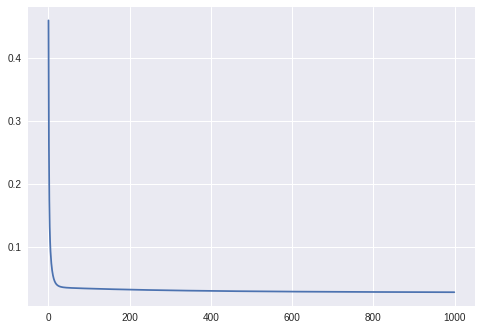

In [0]:
# Gradient descent
LR = 0.000000000000009
# m = np.random.randn(1,len(X.T))/10000
m1 = np.random.randn(1,len(X.T))/10000

error = []
# def gradient_descent(m1,X,Y,Iters,LR):
for i in range(1000):
  m1 = m1 - LR*derivative(m1,X,Y)
  error.append(cost(m1,X,Y))
  if(i%10==0):
    print("error: ",error[i],"iteration: ",i)
#     c = c - derivative_c(m1,c,X,Y)
import matplotlib.pyplot as plt
plt.plot(error)
 

In [0]:
# # m = [5]*24
# # m = np.array(m)
# m = np.random.randn(1,len(X.T))
# # c = np.random.randn(1,1)
# Iters = 100
# # print(m)
# gradient_descent(m,X,Y,Iters,1)


#accuracy
predictions = line(m,TestX)
error = cost(m1,TestX,TestY)
acc = 100 - (error/np.mean(TestY**2))*100
# print(acc.shape)
print("Accuracy: ",acc,"%")

Accuracy:  91.39275552016949 %


In [0]:
TestY.shape

(1334090, 1)

In [0]:
##0.000000000000009